In [1]:
import os
import pandas as pd
import numpy as np
import random as rd
import datetime
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product
from sklearn.preprocessing import LabelEncoder # 문자를 수치로, 수치를 문자로 변환해주는 encoder
import time
import sys
import gc
import pickle
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance

# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [2]:
train = pd.read_csv('./data/sales_train.csv')
test = pd.read_csv('./data/test.csv')
sub = pd.read_csv('./data/sample_submission.csv')
items = pd.read_csv('./data/items.csv')
shops = pd.read_csv('./data/shops.csv')
cats= pd.read_csv('./data/item_categories.csv')

In [3]:
data = pd.read_pickle('data.pkl')

In [4]:
data.loc[data['date_block_num'] == 34]

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
10913804,34,5,5037,0.0,0.0,3,19,5,10,0.0,...,0.494141,0.337402,-0.222046,-0.048553,10,30,1,1,14,14
10913805,34,5,5320,0.0,1.0,3,55,13,2,0.0,...,0.000000,0.000000,0.000000,NaN,10,30,-1,-1,0,0
10913806,34,5,5233,0.0,2.0,3,19,5,10,1.0,...,0.494141,0.337402,0.496826,-0.048553,10,30,1,1,7,7
10913807,34,5,5232,0.0,3.0,3,23,5,16,0.0,...,0.494141,0.331787,0.505371,-0.048553,10,30,1,1,3,3
10913808,34,5,5268,0.0,4.0,3,20,5,11,0.0,...,0.000000,0.000000,0.000000,NaN,10,30,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,0.0,214195.0,20,55,13,2,1.0,...,0.146973,0.196899,-0.475098,-0.290039,10,30,1,-1,11,11
11128000,34,45,16188,0.0,214196.0,20,64,14,42,0.0,...,0.237305,0.155884,0.081116,-0.290039,10,30,-1,-1,2,2
11128001,34,45,15757,0.0,214197.0,20,55,13,2,0.0,...,0.146973,0.196899,0.155884,-0.290039,10,30,1,-1,34,34
11128002,34,45,19648,0.0,214198.0,20,40,11,4,0.0,...,0.224243,0.220825,-0.091736,-0.290039,10,30,-1,-1,11,11


In [7]:
len(data.values)

6639294

In [8]:
data.head()

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
4488710,12,2,27,0.0,0.0,0,19,5,10,0.0,...,1.03418,1.075195,-0.282715,1.211914,0,31,1,1,12,12
4488711,12,2,30,0.0,0.0,0,40,11,4,0.0,...,0.27002,0.291504,-0.483398,1.211914,0,31,1,1,11,11
4488712,12,2,31,0.0,0.0,0,37,11,1,0.0,...,0.27002,0.234009,-0.137451,1.211914,0,31,1,1,11,11
4488713,12,2,32,1.0,0.0,0,40,11,4,0.0,...,0.27002,0.291504,-0.407227,1.211914,0,31,-1,1,12,12
4488714,12,2,33,1.0,0.0,0,37,11,1,1.0,...,0.27002,0.234009,-0.225464,1.211914,0,31,1,1,12,12


In [9]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [18]:
data.loc[data['city_code'] == 30]

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
4828505,12,59,27,0.0,0.0,30,19,5,10,0.0,...,1.034180,1.075195,-0.282715,0.791992,0,31,-1,-1,12,12
4828506,12,59,30,0.0,0.0,30,40,11,4,0.0,...,0.270020,0.291504,-0.483398,0.791992,0,31,1,-1,11,11
4828507,12,59,31,0.0,0.0,30,37,11,1,0.0,...,0.270020,0.234009,-0.137451,0.791992,0,31,1,-1,11,11
4828508,12,59,32,1.0,0.0,30,40,11,4,0.0,...,0.270020,0.291504,-0.407227,0.791992,0,31,1,-1,12,12
4828509,12,59,33,2.0,0.0,30,37,11,1,0.0,...,0.270020,0.234009,-0.225464,0.791992,0,31,1,-1,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11066799,34,59,18454,0.0,152995.0,30,55,13,2,0.0,...,0.146973,0.196899,-0.475098,-0.268799,10,30,1,-1,11,11
11066800,34,59,16188,0.0,152996.0,30,64,14,42,0.0,...,0.237305,0.155884,0.081116,-0.268799,10,30,-1,-1,2,2
11066801,34,59,15757,0.0,152997.0,30,55,13,2,1.0,...,0.146973,0.196899,0.155884,-0.268799,10,30,1,-1,34,34
11066802,34,59,19648,0.0,152998.0,30,40,11,4,0.0,...,0.224243,0.220825,-0.091736,-0.268799,10,30,-1,-1,11,11


In [19]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


##### 지역코드별 판매량 비교 :: city_code    
* shop.csv 파일을 상단 데이터 전처리 과정에서 city_code로 LabelEncoder한 수치형 라벨을 활용하여 판매량 시각화 가능   
* city_code 0~30으로 총 31개의 도시로 구분되어 있음.   
* 일별 상품 판매량을 합친 월별 상품 판매량으로 구분하여 그래프 생성   

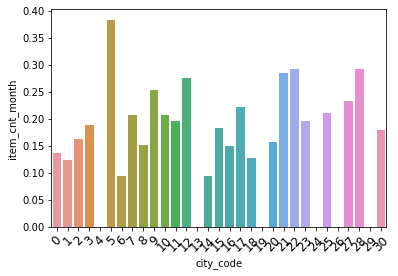

In [21]:
g = sns.barplot(data=data, x="city_code", y="item_cnt_month", ci=None)
ax = g

plt.xticks(fontsize=12, rotation=45)
plt.show()

* 가장 판매량이 많은 도시는 city_code == 5인 곳이며, 한달 판매량이 가장 많은 도시에 위치하는 상점의 분포 및 추세를 확인할 수 있을 것이며, 판매량이 없는 곳은 지역별 상점의 유무를 확인하여 추가적으로 지역의 수요가 있는지 확인 가능하다.

##### 상점별 판매량 비교 :: shop_id       
* shop.csv 파일을 상단 데이터 전처리 과정에서 shop_id 로 LabelEncoder한 수치형 라벨을 활용하여 판매량 시각화 가능

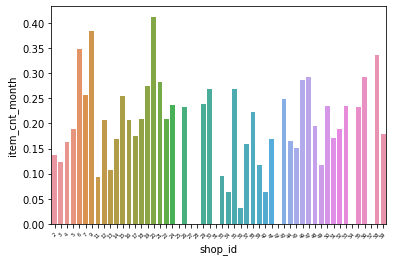

In [64]:
g = sns.barplot(data=data, x="shop_id", y="item_cnt_month", ci=None)
ax = g

#plt.figure(figsize=(30, 8))
plt.xticks(fontsize=5, rotation=45)
plt.show()

* 가장 높은 판매량을 가지는 상점은 shop_id == 20   
* 해당 상점만의 특성, 이벤트, 지역 특성, 소비자 유형을 파악하면 판매량이 높은 이유를 알 수 있다.    
* 해당 상점에서 판매량에 해당하는 아이템 분포를 알 수 있다.

##### 가장 높은 판매량을 가진 지역을 기준으로 그 지역에 위치하는 상점별 판매량 비율

In [50]:
city_sell

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
7490513,21,9,1,0.0,0.0,5,76,15,31,0.0,...,0.0,0.0,0.0,NaN,9,31,-1,-1,0,6
7490514,21,9,26,0.0,0.0,5,40,11,4,0.0,...,0.0,0.0,0.0,NaN,9,31,-1,-1,0,0
7490515,21,9,30,0.0,0.0,5,40,11,4,0.0,...,0.0,0.0,0.0,NaN,9,31,-1,-1,12,20
7490516,21,9,31,0.0,0.0,5,37,11,1,0.0,...,0.0,0.0,0.0,NaN,9,31,-1,-1,12,20
7490517,21,9,32,0.0,0.0,5,40,11,4,0.0,...,0.0,0.0,0.0,NaN,9,31,-1,-1,12,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713518,33,9,22162,0.0,0.0,5,40,11,4,0.0,...,0.0,0.0,0.0,NaN,9,31,-1,-1,6,15
10713519,33,9,22163,0.0,0.0,5,40,11,4,0.0,...,0.0,0.0,0.0,NaN,9,31,-1,-1,0,2
10713520,33,9,22164,0.0,0.0,5,37,11,1,0.0,...,0.0,0.0,0.0,NaN,9,31,-1,-1,6,8
10713521,33,9,22166,0.0,0.0,5,54,12,61,0.0,...,0.0,0.0,0.0,NaN,9,31,-1,-1,24,24


In [54]:
city_sell = data[data.city_code ==5]
city_sell = city_sell.iloc[:, [1, 3]]
city_sell

,shop_id,item_cnt_month
7490513,9,0.0
7490514,9,0.0
7490515,9,0.0
7490516,9,0.0
7490517,9,0.0
...,...,...
10713518,9,0.0
10713519,9,0.0
10713520,9,0.0
10713521,9,0.0


In [55]:
city_sell.groupby('shop_id').sum()

,item_cnt_month
shop_id,
9,6608.0


* city_code로 가장 높은 판매량을 가졌던 5 도시에는 shop_id가 9인 하나의 상점만 존재하는 것을 확인    
* 하나의 상점에서 나오는 매출액이 다른 도시의 지점보다 크기 때문에 해당 상점의 판매량이 높은 이유를 분석하여 다른 상점에 적용하여 판매량을 높일 수 있다.

##### 가장 많은 판매량을 가진 상점에서 아이템별 판매량 ::::: 뭔가 안 풀리네요 ㅋㅋㅋㅋㅋ 걍 빼도 될까요?ㅋㅋㅋㅋㅋ

In [56]:
data.head()

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
4488710,12,2,27,0.0,0.0,0,19,5,10,0.0,...,1.03418,1.075195,-0.282715,1.211914,0,31,1,1,12,12
4488711,12,2,30,0.0,0.0,0,40,11,4,0.0,...,0.27002,0.291504,-0.483398,1.211914,0,31,1,1,11,11
4488712,12,2,31,0.0,0.0,0,37,11,1,0.0,...,0.27002,0.234009,-0.137451,1.211914,0,31,1,1,11,11
4488713,12,2,32,1.0,0.0,0,40,11,4,0.0,...,0.27002,0.291504,-0.407227,1.211914,0,31,-1,1,12,12
4488714,12,2,33,1.0,0.0,0,37,11,1,1.0,...,0.27002,0.234009,-0.225464,1.211914,0,31,1,1,12,12


In [67]:
shop_sell = data[data.shop_id == 20]
# item_id , item_cnt_month, item_category_id
shop_sell = shop_sell.iloc[:, [3, 6]]
shop_sell

,item_cnt_month,item_category_id
7547519,0.0,76
7547520,0.0,40
7547521,0.0,40
7547522,0.0,37
7547523,0.0,40
...,...,...
10756822,0.0,40
10756823,0.0,40
10756824,0.0,37
10756825,0.0,54


In [69]:
shop_sell.groupby('item_category_id').sum().max

<bound method NDFrame._add_numeric_operations.<locals>.max of                   item_cnt_month
item_category_id                
2                            0.0
3                            0.0
4                            0.0
5                            0.0
6                            0.0
...                          ...
76                           0.0
77                           0.0
78                           0.0
79                           0.0
83                           3.0

[69 rows x 1 columns]>